# 1. Collecting data

### What subject is your data about? What is the source of your data?

- Dữ liệu sử dụng trong đồ án này là về điểm số (Toán, viết, đọc) của 1000 học sinh Trung học Phổ thông ở Mỹ.
- Dữ liệu được lấy trên Kaggle.com ở <a href="https://www.kaggle.com/spscientist/students-performance-in-exams">link</a>

### Do authors of this data allow you to use like this? You can check the data license

- License trong phần này là unknown, nghĩa là chưa có bản quyền. Việc chúng ta tải về và sử dụng là hợp pháp.
- Hơn nữa, trong đồ án này, dataset này hoàn toàn được sử dụng cho mục đích học tập nên sẽ không vi phạm bản quyền.

### How did authors collect data?

Tác giả, Jakki Seshapanpu, không nói rõ là thu thập dữ liệu từ các trường khác nhau trong các bang khác nhau ở nước Mỹ, mà chỉ nói thu thập từ các học sinh THPT và các thông đinh về sinh viên được bảo mật.

Các thông tin về học sinh mà tác giả thu thâp gồm: giới tính, dân tộc (tác giả cũng giấu luôn cả tên dân tộc), trình độ học vấn của cha mẹ, phần ăn buổi trưa, đã hoàn thành khóa học luyện thi hay chưa, và số điểm toán, đọc, viết.

# 2. Exploring data

### Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Đọc dữ liệu từ csv vào dataframe

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dữ liệu gồm bao nhiêu dòng và bao nhiêu cột?

In [4]:
df.shape

(1000, 8)

Dữ liệu gồm 1000 dòng (tương đương với 1000 học sinh) và 8 cột (8 trường dữ liệu)

### Mỗi dòng trong tập dữ liệu có ý nghĩa là gì? Có các dòng nào có ý nghĩa khác các dòng còn lại không?

Theo quan sát sơ bộ thì mỗi dòng dữ liệu thể hiện thông tin của một học sinh và có vẻ như không có dòng nào mang ý nghĩa khác các dòng còn lại.

### Dữ liệu có dòng nào bị lập không?

In [5]:
False if df.duplicated().sum() == 0 else True

False

Dữ liệu không có các dòng trùng nhau.

### Mỗi cột có ý nghĩa gì?

Có tất cả 8 trường dữ liệu:
- **gender:** Giới tính của học sinh.
- **race/ethnicity:** Học sinh thuộc chủng tộc/dân tộc nào.
- **parental level of education:** Trình độ học vấn của cha mẹ học sinh đó.
- **lunch:** Tiêu chuẩn suất ăn trưa của học sinh.
- **test preparation course:** Học sinh đã hoàn thành khóa học ôn tập hay chưa?
- **math score:** Điểm toán.
- **reading score:** Điểm đọc.
- **writing score:** Điểm viết.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Có 4 cột có kiểu dữ liệu `object` là "gender", "race/ethnicity", "parental level of education" và "lunch". Trong Pandas, kiểu dữ liệu `object` thường sẽ là kiểu dữ liệu `str`, nhưng ngoài ra, kiểu dữ liệu `object` có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu `object` chứa địa chỉ). 3 cột điểm có kiểu dữ liệu mong muốn, đó là `int64`.

Kiểu dữ liệu thật lưu bên dưới của 4 cột có kiểu dữ liệu `object` trên là:

In [7]:
type(df.loc[0, 'gender'])

str

In [8]:
type(df.loc[0, 'race/ethnicity'])

str

In [9]:
type(df.loc[0, 'parental level of education'])

str

In [10]:
type(df.loc[0, 'lunch'])

str

Như vậy, nằm trong dự đoán, 4 cột này đều có kiểu dữ liệu thật là `str`. Các kiểu dữ liệu của mỗi cột đã hợp lý và không cần phải tiền xử lý nữa, việc còn lại của chúng ta là bắt tay vào việc nghiên cứu phân phối của từng trường dữ liệu một.

### Khám phá dữ liệu

#### Với mỗi cột dữ liệu dạng numeric thì các giá trị được phân bố như thế nào?

Theo trực quan ở trên, thì ta chỉ có 3 cột điểm là thuộc dạng numeric, còn lại đều là dạng catogerical. Phân bố của 3 cột điểm sẽ như thế nào?

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Cột min của môn Toán là thấp nhất, trong khi đó thì môn đọc có giá trị min cao nhất (có thể vì môn này là dễ nhất). Còn các giá trị khác không có gì bất thường.

Các cột điểm phân bố như thế nào?

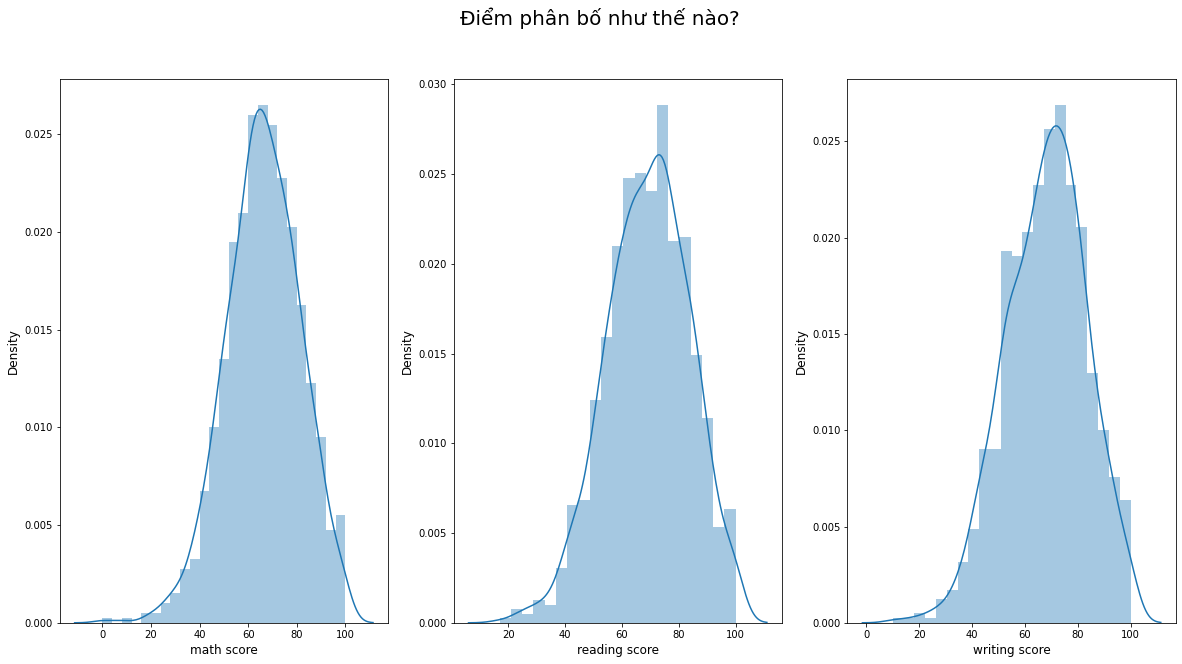

In [12]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df[["math score", "reading score", "writing score"]].items():
    sns.distplot(value, ax=ax[index])
    ax[index].set_xlabel(xlabel=col, size=12)
    ax[index].set_ylabel(ylabel="Density", size=12)
    index += 1
    
fig.suptitle("Điểm phân bố như thế nào?", fontsize=20);

Phân bố của ba cột điểm bị lệch nhẹ qua bên trái. Đây là phân bố điểm theo thang 100. Còn phân bố theo chuẩn GPA thì sẽ phân bố như thế nào? Trước tiên cần tiền xử lý một tí về điểm của học sinh, bằng cách chuyển các cột điểm theo thang 100 thành các cột điểm theo thang GPA

In [13]:
convertor = {'A': 90, 'B': 80, 'C': 70, 'D': 60}

def gpa_convert(score):
    for grade, threshold in convertor.items():
        if score >= threshold:
            return grade
    return 'F'
    
df["math GPA"] = df["math score"].apply(lambda x : gpa_convert(x))
df["reading GPA"] = df["reading score"].apply(lambda x : gpa_convert(x))
df["writing GPA"] = df["writing score"].apply(lambda x : gpa_convert(x))

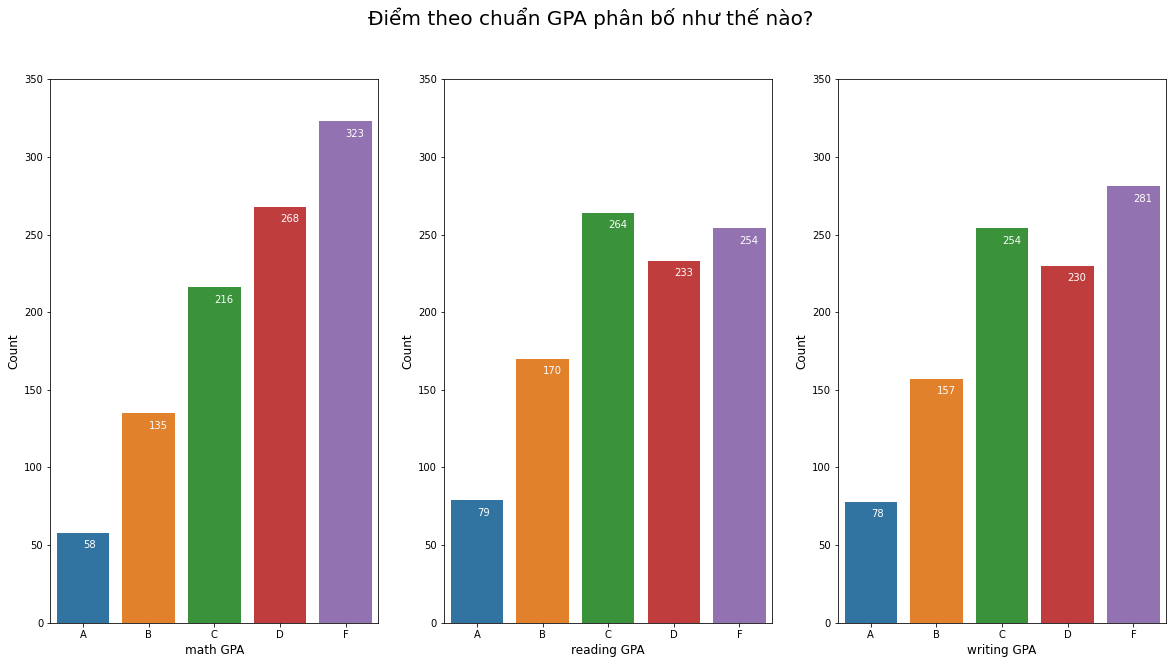

In [14]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in ["math GPA", "reading GPA", "writing GPA"]:
    sns.countplot(df[col], ax=ax[index], order=['A', 'B', 'C', 'D', 'F'])
    ax[index].set_xlabel(xlabel=col, size=12)
    ax[index].set_ylabel(ylabel="Count", size=12)
    ax[index].set_ylim([0, 350])
    # Annotate value labels to each grade
    for i, value in enumerate(df[col].value_counts().sort_index()): 
        ax[index].annotate(value, xy=(i, value-10), color='white') 
    index += 1
    
fig.suptitle("Điểm theo chuẩn GPA phân bố như thế nào?", fontsize=20);

Nhận xét: có đến 323 em rớt môn toán, 254 em rớt môn đọc và 281 em rớt môn viết. Có thể thấy là môn toán là môn khó nhất, vì do có nhiều học sinh trượt nhất.

Khi mô tả điểm số học sinh trong từng cột điểm, thì câu hỏi đặc ra là có bao nhiêu em đậu cả 3 môn, bao nhiêu em đậu 2 môn, 1 môn, hoặc trượt hết? Đầu tiên, tiền xử lý bằng cách tạo thêm một cột tên là "passed" để đếm số lượng môn mà học sinh đó đậu.

In [15]:
def passed_exam_count(student):
    passed = 0
    for grade in ["math GPA", "reading GPA", "writing GPA"]:
        if student[grade] < 'F':
            passed += 1
    return passed

df["passed"] = df.apply(lambda x : passed_exam_count(x), axis=1)

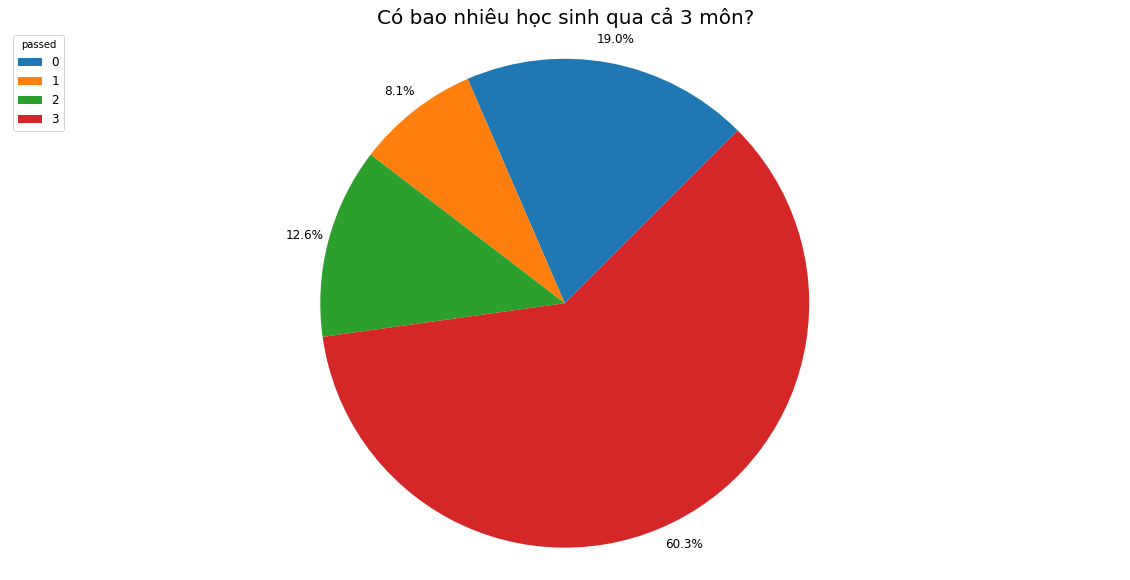

In [16]:
passedExam = df["passed"].value_counts().sort_index()
ax = passedExam.plot(kind='pie',
                     figsize = (20,10),
                     autopct='%1.1f%%', 
                     startangle=45,
                     labels=None,         
                     pctdistance=1.1,    
                     textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('Có bao nhiêu học sinh qua cả 3 môn?', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=[0, 1, 2, 3], title="passed", fontsize=12);

Nhận xét: Nhìn tổng quan thì số lượng học sinh đậu cả 3 môn vẫn chiếm tỉ lệ cao nhất. Số lượng học sinh trược cả 3 môn gần như sấp xỉ tổng số lượng của học sinh rớt 1 môn và học sinh rớt 2 môn.

Trong các cột dữ liệu dạng numeric, liệu có giá trị nào bị thiếu hay không?

In [17]:
def missing_ratio(s):
    return s.isna().mean() * 100
df[['math score',  'reading score', 'writing score']].agg([missing_ratio])

,math score,reading score,writing score
missing_ratio,0.0,0.0,0.0


Không có giá trị nào bị thiếu trong 3 cột này. Việc này có thể những đọc giả tinh ý thì cũng có thể đoán ra được 3 cột này "rất khó" để bị thiếu, vì nó là cột mà ta muốn đào sâu sau này nhất.

#### Với mỗi cột dữ liệu dạng categorical thì các giá trị được phân bố như thế nào?

Các cột dạng categorical sẽ là "gender", "race/ethnicity", "parental level of education" và "lunch".

In [18]:
df.describe(include=object).T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642
math GPA,1000,5,F,323
reading GPA,1000,5,C,264
writing GPA,1000,5,F,281


Có thể thấy cột "gender" có số lượng mỗi bên đồng đều nhất, số lượng chênh lệch không nhiều. Các cột còn lại thì bị lệch một cách đáng kể mà mắt thường có thể nhận thấy.

Có bao nhiêu học sinh trong mỗi group của trường giá trị race/ethnicity?

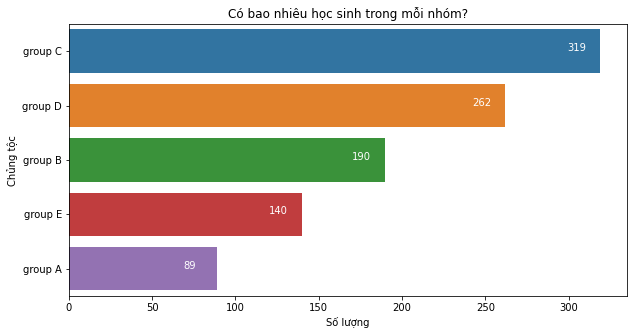

In [19]:
race_counts = df['race/ethnicity'].value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(x=race_counts.values, y=race_counts.index, orient='h')
ax.set_title("Có bao nhiêu học sinh trong mỗi nhóm?")
ax.set_xlabel(xlabel="Số lượng")
ax.set_ylabel(ylabel="Chủng tộc")

for index, value in enumerate(race_counts): 
    plt.annotate(value, xy=(value-20, index), color='white')

Các sinh viên chủ yếu thuộc nhóm C và nhóm D là nhiều nhất.

Trình độ học vấn của phụ huynh phân bố ra sao?

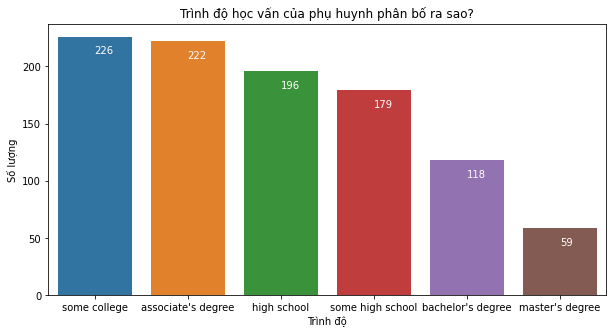

In [20]:
parental_level_counts = df['parental level of education'].value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(x=parental_level_counts.index, y=parental_level_counts.values)
ax.set_title("Trình độ học vấn của phụ huynh phân bố ra sao?")
ax.set_xlabel(xlabel="Trình độ")
ax.set_ylabel(ylabel="Số lượng")

for index, value in enumerate(parental_level_counts): 
    plt.annotate(value, xy=(index, value-15), color='white') 

Đa số các bậc phụ huynh đều đã có bằng đại học hoặc bằng cao đẳng.

Kết hợp cả hai đồ thị trên, ta có thể xem phân phối được loại bằng cấp nào của phụ huynh là phổ biến nhất trong các chủng tộc/dân tộc. 

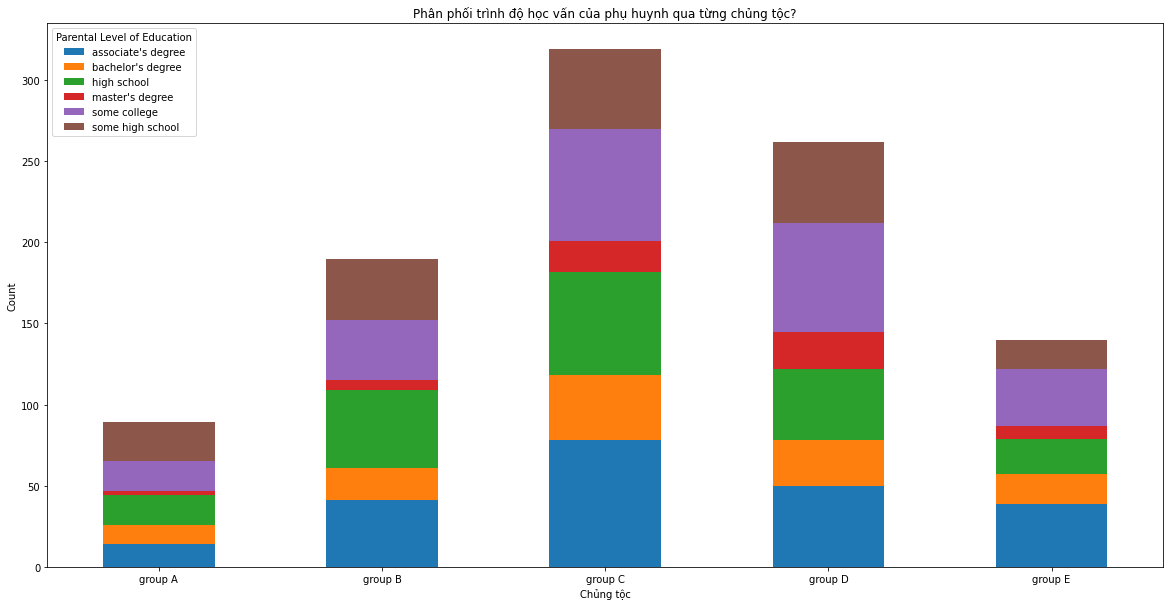

In [21]:
ax = pd.crosstab(df["race/ethnicity"], [df["parental level of education"]]).plot.bar(stacked=True, figsize=(20,10))
ax.set_title("Phân phối trình độ học vấn của phụ huynh qua từng chủng tộc?")
ax.set_xlabel(xlabel="Chủng tộc")
ax.set_ylabel(ylabel="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(loc="upper left", title="Parental Level of Education");

Số lượng phụ huynh với bằng "tú tài" (cấp 3) và một vài bằng khác vẫn nhiều nhất trong tất cả các nhóm chủng tộc.

Có cột nào bị thiếu giá trị hay không?

In [22]:
df[["gender", "race/ethnicity", "parental level of education", "lunch"]].isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
dtype: int64

Tới đây, có thể thấy tác giả thu thập dữ liệu rất tốt, không một cột nào bị thiếu dữ liệu cả.

### Làm rõ hơn về ý nghĩa của cột dữ liệu dạng categorical

- **lunch:** cột này có 2 giá trị là "standard" hoặc "free/reduced". "Standard" có nghĩa là tiêu chuẩn, tức là một bữa ăn đạt tiêu chuẩn (theo một chuẩn đánh giá của Mỹ, <a href="https://schoolnutrition.org/AboutSchoolMeals/SchoolMealTrendsStats/">xem ở đây để thêm chi tiết</a>). Còn đối với bữa ăn "free/reduced" thì học sinh được hỗ trợ miễn phí hoặc giảm một số tiền nhất định. Về chất lượng thì bữa ăn giống nhau.
- **test preparation course:** có nghĩa là sinh viên đã hoàn thành khóa học ôn luyện trước khi làm bài kiểm tra hay chưa (giống như kiểu học thêm ở Việt Nam), gồm 2 giá trị, đã hoàn thành (Completed) hoặc không (None).

# 3. Ask meaningful question

## 3.1. Bữa ăn nói gì với điểm số? Và câu chuyện giàu nghèo đăng sau đó.

# 4. Preprocess and analyze data to answer questions

Câu 1:

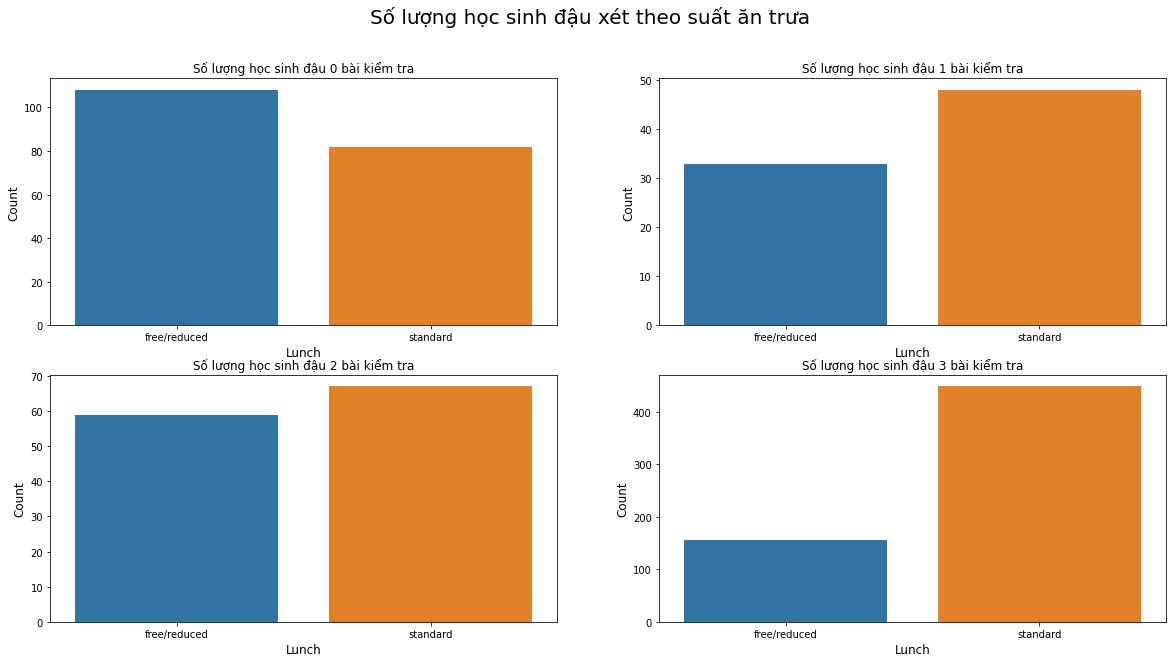

In [23]:
pass0=df[df['passed']==0]
pass1=df[df['passed']==1]
pass2=df[df['passed']==2]
pass3=df[df['passed']==3]

col = ['lunch','passed']

pass0_df = pass0[col].groupby('lunch').agg('count').reset_index()
pass1_df = pass1[col].groupby('lunch').agg('count').reset_index()
pass2_df = pass2[col].groupby('lunch').agg('count').reset_index()
pass3_df = pass3[col].groupby('lunch').agg('count').reset_index()

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for df_temp in [pass0_df, pass1_df, pass2_df, pass3_df]:
    sns.barplot(x=df_temp['lunch'], y=df_temp['passed'], ax=ax[index])
    ax[index].set_xlabel(xlabel="Lunch", size=12)
    ax[index].set_ylabel(ylabel="Count", size=12)

    ax[index].set_title("Số lượng học sinh đậu "+str(index)+ " bài kiểm tra")
    index += 1
    
fig.suptitle("Số lượng học sinh đậu xét theo suất ăn trưa", fontsize=20);

Suất ăn trưa có ảnh hưởng gì đến việc học tập của các em không? Thoạt đầu thì ta tưởng do xuất ăn của học sinh không cung cấp đủ chất dinh dưỡng nên việc học của các em bị giảm đáng kể. Nhưng thực tế thì không phải vậy, trong <a href="https://www.brookings.edu/blog/brown-center-chalkboard/2017/05/03/how-the-quality-of-school-lunch-affects-students-academic-performance/">bài báo</a> có đưa ra một dẫn chứng là từ khi cung cấp các bữa ăn miễn phí hoặc giảm một số tiền đáng kể, thì nhiều học sinh có một bữa ăn đầy đủ chất giúp chúng có thành tích tốt trong học tập hơn. Chất dinh dưỡng trong cả 2 loại bữa ăn này là như nhau. Có thể sau khi đọc tới đây, người đọc có thể hình dung là cùng một mức độ dinh dưỡng thì tại sao hai loại suất ăn trưa lại ảnh hưởng đến kết quả học tập? Quay lại định nghĩa một về 2 loại bữa ăn này: (1) free/reduced là được chính phủ Mỹ hỗ trợ cấp, (2) standard là bữa ăn chuẩn mà bố mẹ sẽ trả cho con em mình. Tại sao chính phủ Mỹ lại hỗ trợ? rõ ràng là do điều kiện gia đình của học sinh đó có thể không phải quá khá giả, hoặc nghèo nên mới cần sự trợ giúp này.

Trở về với dữ liệu mà chúng ta có, theo như đồ thị trực quan ở trên, các em trượt cả 3 môn có suất ăn "giảm giá" nhiều hơn các em có suất ăn đạt chuẩn. Trong thống kế về số em đậu 1 môn trở lên, thì số lượng các em có suất ăn chuẩn đều cao hơn rất nhiều. Đáng chú ý là trong biểu đồ các em đậu 3 môn, số học sinh có bữa ăn chuẩn cao gần như gấp 3 lần so với các em có bữa ăn hỗ trợ. Rõ ràng là sự giàu nghèo đã tác động lên thành tích của các em. Nhưng ta chưa biết mức độ giàu nghèo đã tác động như thế nào. Ta thử xem xét một vài khía cạnh tại sao như vậy:
- Có phải phụ huynh có trình độ học vấn cao nên gia đình khá giả, tạo điều kiện lẫn môi trường học cho các em?
- Có phải gia đình khá giả cho con em mình ôn luyện 1 khóa trước khi đi thi?

Việc trả lời một câu hỏi này thật chất là tìm ra một câu hỏi khác. Các câu hỏi nhỏ trên mục đích là tìm ra mối liên hệ giữa các trường dữ liệu có sẵn trong dataset liên quan tới câu hỏi lớn "Câu chuyện giàu nghèo phía sau đó".

---

Trước khi thống kê về số lượng học sinh tham gia khóa ôn luyện, thì ta thử xem xét liệu những phụ huynh có trình độ học vấn cao quan tâm đến thành tích học tập của con mình?

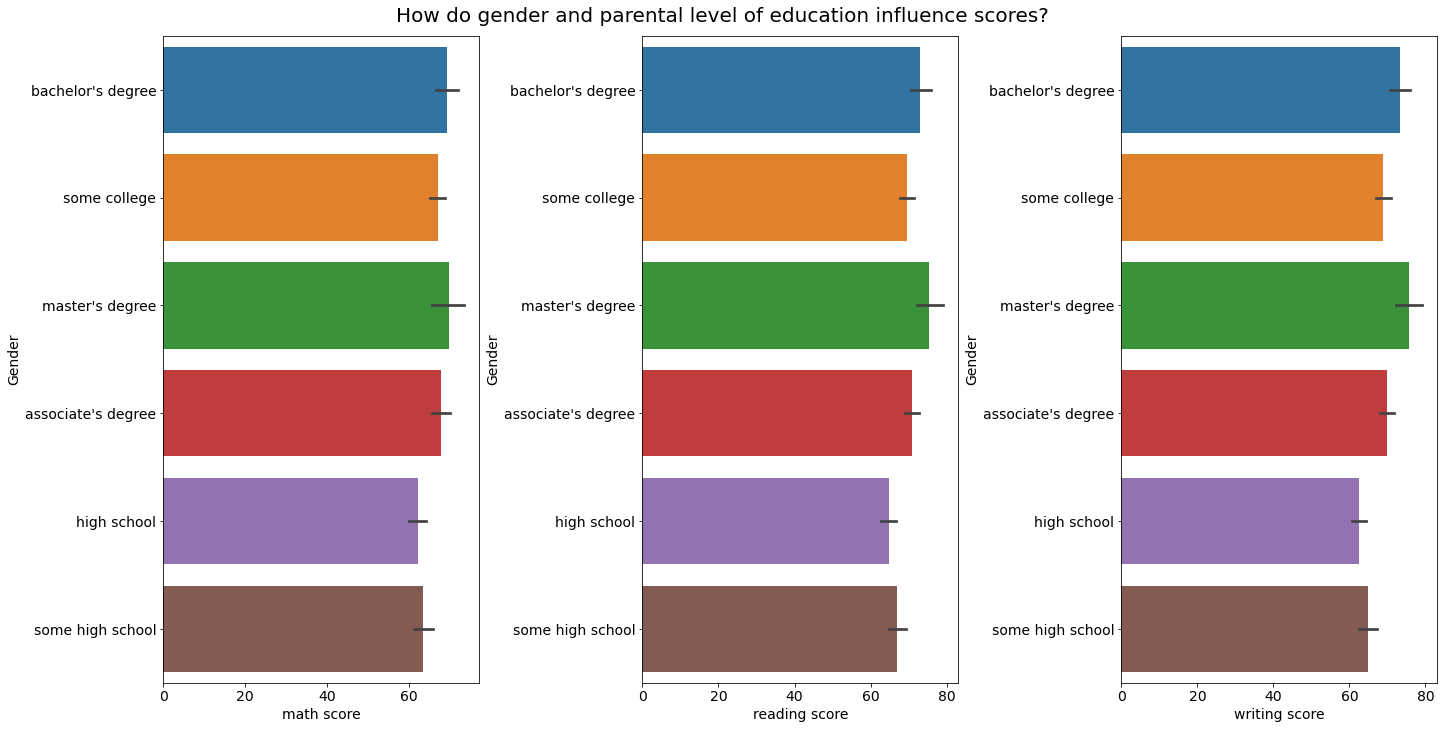

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
ax = ax.flatten()

for index, col in enumerate(["math score", "reading score", "writing score"]):
    sns.barplot(x=col, y="parental level of education", data=df, ax=ax[index])
    ax[index].set_xlabel(col, fontsize = 14)
    ax[index].set_ylabel("Gender", fontsize=14)
    ax[index].xaxis.set_tick_params(labelsize=14)
    ax[index].yaxis.set_tick_params(labelsize=14)

fig.suptitle("How do gender and parental level of education influence scores?", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Sơ đồ trên cho ta thấy, rõ ràng là những phụ huynh có bằng đại học là cử nhân hay thạc sĩ thì có quan tâm đến chuyện học của con em mình hơn, nhưng liệu có trình độ học vấn cao thì gia đình có khá giả hơn (việc này thể hiện qua suất cơm trưa). Xem xét biểu đồ bên dưới.

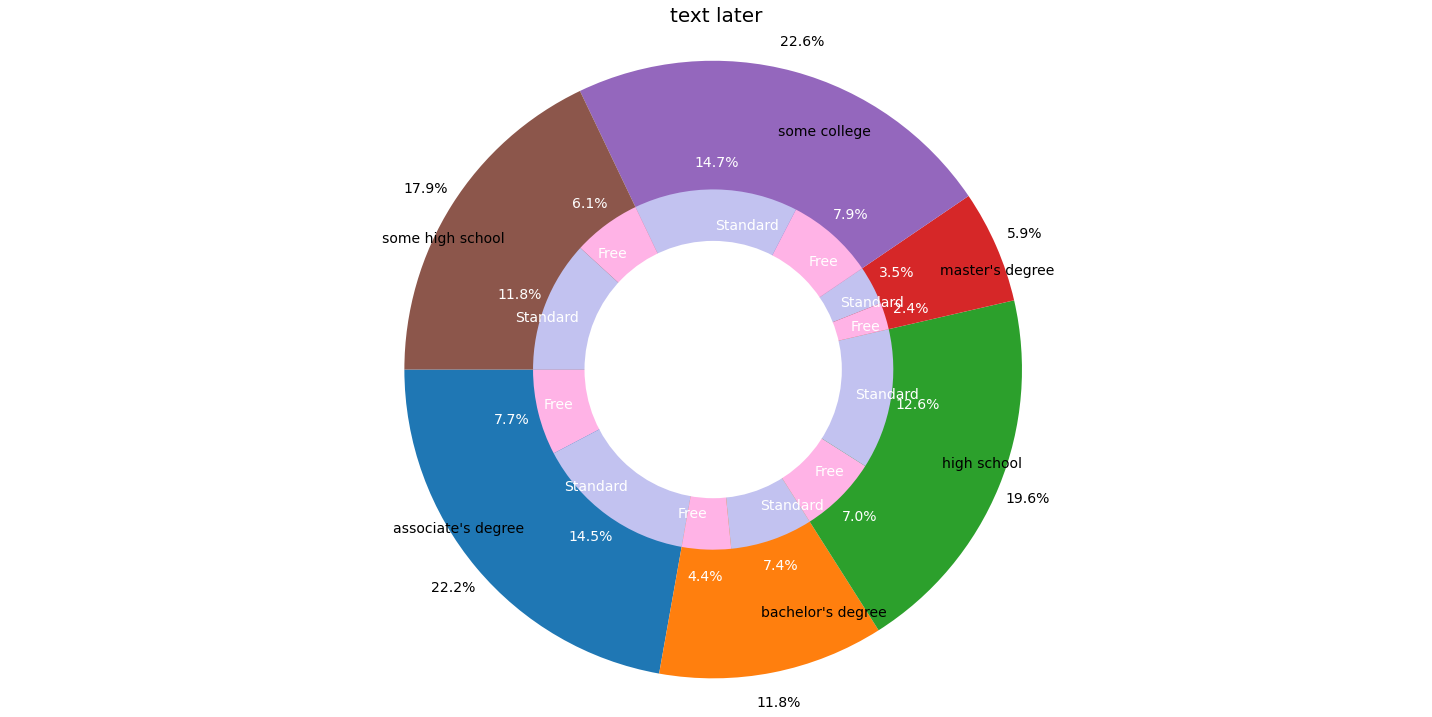

In [25]:
plt.figure(figsize=(20, 10))
gpa_counts = pd.crosstab(df["parental level of education"], df["lunch"])
totals_labels = gpa_counts.index
totals = gpa_counts.values.sum(axis=1)
by_gender = gpa_counts.values.flatten()
by_gender_labels = len(gpa_counts) * ["Free", "Standard"]

by_gender_colors = len(gpa_counts) * ['#ffb3e6', '#c2c2f0']
explode = (0.3,0.3,0.3,0.3,0.3) 

plt.pie(totals, 
        labels=totals_labels,
        autopct='%1.1f%%', 
        pctdistance=1.1,
        labeldistance=0.8,
        startangle=180,
        textprops={'fontsize': 14},
        radius=12)
plt.pie(by_gender,
        labels=by_gender_labels,
        colors=by_gender_colors,
        autopct='%1.1f%%', 
        pctdistance=1.15,
        labeldistance=0.8,
        startangle=180,
        textprops={'fontsize': 14, 'color': 'white'},
        radius=7)

centre_circle = plt.Circle((0,0), 5, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title(f'text later', fontsize=20)

plt.axis('equal')
plt.tight_layout()
plt.show()

Như có thể thấy trong sơ đồ bên trên thì số lượng suất ăn chuẩn lúc nào cũng nhiều hơn suất ăn hỗ trợ (gần như là gấp đôi). Điều này có thể thấy trình độ học vấn của phụ huynh không ảnh hưởng đến mức độ giàu nghèo. Từ đây ta có thể ngầm suy luận rằng, có thể việc phụ huynh có bằng cử nhân hay đại học thường quan tâm và chỉ dạy cho con em mình để chúng có một kết quả tốt trong học tập. Tới đây ta vẫn chưa biết được là độ giàu nghèo ảnh hưởng đến kết quả học tập như thế nào. Ta thử bước qua câu hỏi nhỏ thứ 2, đó là có phải gia đình tự mua suất ăn trưa chuẩn cho con em mình thì có điều kiện hơn, cho con em mình học một khóa ôn thi trước khi thi? Cùng xem xét biểu đồ bên dưới.

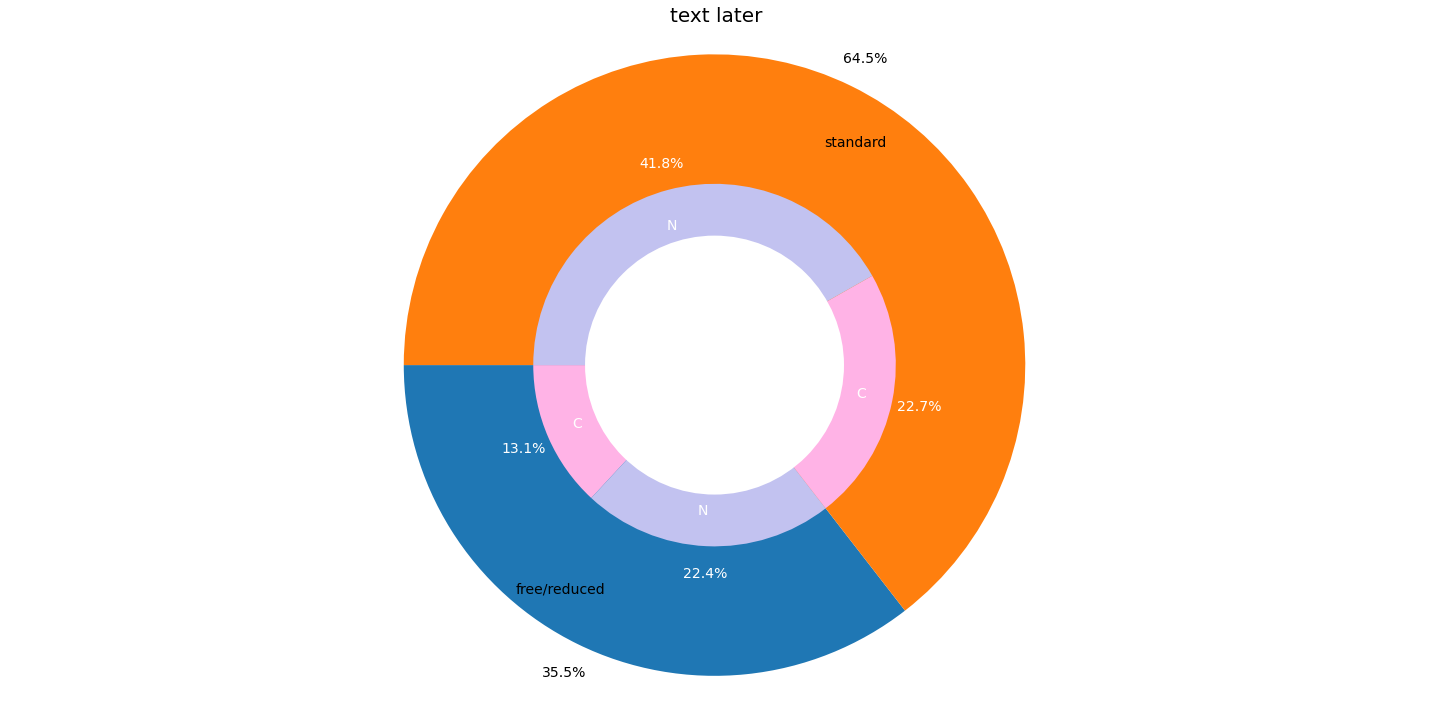

In [26]:
plt.figure(figsize=(20, 10))
gpa_counts = pd.crosstab(df["lunch"], df["test preparation course"])
totals_labels = gpa_counts.index
totals = gpa_counts.values.sum(axis=1)
by_gender = gpa_counts.values.flatten()
by_gender_labels = len(gpa_counts) * ["C", "N"]

by_gender_colors = len(gpa_counts) * ['#ffb3e6', '#c2c2f0']
explode = (0.3,0.3,0.3,0.3,0.3) 

plt.pie(totals, 
        labels=totals_labels,
        autopct='%1.1f%%', 
        pctdistance=1.1,
        labeldistance=0.8,
        startangle=180,
        textprops={'fontsize': 14},
        radius=12)
plt.pie(by_gender,
        labels=by_gender_labels,
        colors=by_gender_colors,
        autopct='%1.1f%%', 
        pctdistance=1.15,
        labeldistance=0.8,
        startangle=180,
        textprops={'fontsize': 14, 'color': 'white'},
        radius=7)

centre_circle = plt.Circle((0,0), 5, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title(f'text later', fontsize=20)

plt.axis('equal')
plt.tight_layout()
plt.show()

Theo như quan sát, không quan trọng là có suất ăn như thế nào, thì số lượng học sinh hoàn thành khóa học luyện thi trước khi thi ít hơn rất nhiều hơn học sinh không hoàn thành (xấp xỉ một nửa). Có thể có 2 giả thuyết cho câu hỏi này: (1) giá của khóa học đó không đáng kể so với khẩu phần ăn nên việc phụ huynh cho con em mình tùy quyền quyết định là có học hay không hoàn toàn có thể xảy ra, (2) hai trường dữ liệu này không có liên quan đến nhau.

Thật không may tới đây, ta vẫn chưa biết được tại sao việc giàu nghèo lại ảnh hưởng đến kết quả học tập của học sinh, thì cùng xét xem dân tộc có ảnh hưởng gì không. Hiện tượng này dựa trên bối cảnh giống Việt Nam, một số dân tộc không phải dân tộc Kinh còn ngèo nên họ chưa chú trọng việc học tập, mà chú trọng đến việc kiếm tiền sống qua ngày trước. Học sinh phải phụ ba mẹ làm nương rẫy, nên không có thời gian tập trung vào học tập. Xét xem các học sinh bên Mỹ có như vậy không, vài người cho là bên Mỹ đã phát triển, chính phủ họ hỗ trợ rất nhiều nên sẽ không có chuyện giống như Việt Nam. Nhưng với phong cách khoa học, không có đường tắt cho việc nghiên cứu, nên ta cứ rà soát hết, có khi lại tìm ra được điều gì đó mới mẻ.

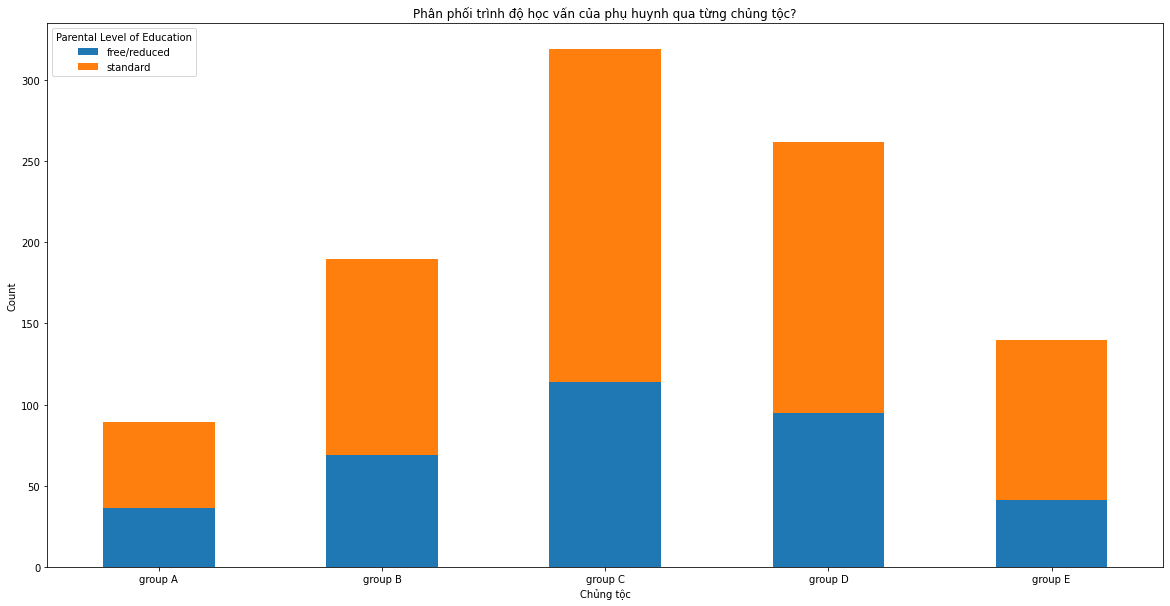

In [27]:
ax = pd.crosstab(df["race/ethnicity"], [df["lunch"]]).plot.bar(stacked=True, figsize=(20,10))
ax.set_title("Phân phối trình độ học vấn của phụ huynh qua từng chủng tộc?")
ax.set_xlabel(xlabel="Chủng tộc")
ax.set_ylabel(ylabel="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(loc="upper left", title="Parental Level of Education");

Biểu đồ trên không nói lên điều gì về giả thuyết đã đặt ở trên. Dữ liệu của chúng ta không đủ để nói lên được gì, nhưng có một bài nghiên cứu của trường đại học Campbellsville tương tự chỉ ra rằng: các em có các suất ăn miễn phí, hoặc được hỗ trợ, thường ít có cơ hội tiếp nạp đủ dinh dưỡng. Nói cách khác, buổi trưa là buổi nhiều dinh dưỡng nhất của các em. Nên sự giàu nghèo tác động chủ yếu là lên chất dinh dưỡng (trường dữ liệu khó đo đạt và bị thiếu trong dataset).

Tác động trực tiếp:
- Các vấn đề về trí tuệ có thể bắt nguồn từ chế độ dinh dưỡng không lành mạnh và thói quen ăn uống không đúng.
- Sự thiếu hụt dinh dưỡng được chứng minh là có ảnh hưởng đến sự phát triển nhận thức của trẻ. Điều này sẽ ảnh hưởng đến khả năng học tập của học sinh.

Tác động gián tiếp:
- Có thể ảnh hưởng nghiêm trọng đến kết quả học tập của học sinh theo thời gian. Học sinh có lối sống không lành mạnh có nguy cơ mắc bệnh cao hơn rất nhiều. Những căn bệnh này sau đó có ảnh hưởng đến lượng thời gian nghỉ học trên lớp. Vì thế, học sinh có nhiều khả năng bị tụt lại phía sau. Và khi ở trong lớp, các em có nhiều khả năng sẽ có ít năng lượng hơn và khó tập trung vào bài giảng.

# 5. Reflection

# 6. Reference